In [1]:
# !pip install tensorflow

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Conversation.csv')

In [5]:
data.head()

,Unnamed: 0,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.


In [6]:
convo_text = pd.DataFrame({'text': pd.concat([data['question'], data['answer']], ignore_index=True)})

In [7]:
convo_text

,text
0,"hi, how are you doing?"
1,i'm fine. how about yourself?
2,i'm pretty good. thanks for asking.
3,no problem. so how have you been?
4,i've been great. what about you?
...,...
7445,are you right-handed?
7446,yes. all my life.
7447,you're wearing out your right hand. stop using...
7448,but i do all my writing with my right hand.


In [8]:
convo_text.shape

(7450, 1)

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer()

In [11]:
## To clean data and Convert DataFrame to List Format
cleaned_texts = [str(t) for t in convo_text.text if isinstance(t, str) or not pd.isnull(t)]
cleaned_texts

['hi, how are you doing?',
 "i'm fine. how about yourself?",
 "i'm pretty good. thanks for asking.",
 'no problem. so how have you been?',
 "i've been great. what about you?",
 "i've been good. i'm in school right now.",
 'what school do you go to?',
 'i go to pcc.',
 'do you like it there?',
 "it's okay. it's a really big campus.",
 'good luck with school.',
 "how's it going?",
 "i'm doing well. how about you?",
 'never better, thanks.',
 'so how have you been lately?',
 "i've actually been pretty good. you?",
 "i'm actually in school right now.",
 'which school do you attend?',
 "i'm attending pcc right now.",
 'are you enjoying it there?',
 "it's not bad. there are a lot of people there.",
 'good luck with that.',
 'how are you doing today?',
 "i'm doing great. what about you?",
 "i'm absolutely lovely, thank you.",
 "everything's been good with you?",
 "i haven't been better. how about yourself?",
 'i started school recently.',
 'where are you going to school?',
 "i'm going to pcc.

In [12]:
tokenizer.fit_on_texts(cleaned_texts)

In [13]:
len(tokenizer.word_index)

2519

In [14]:
#Core logic to Convert Textual Convo to numeric form
input_sentences = []
for sentence in cleaned_texts:
 tokenizer_sentences = tokenizer.texts_to_sequences([sentence])[0]

#
 for i in range(1, len(tokenizer_sentences)):
  input_sentences.append(tokenizer_sentences[:i+1])

In [15]:
input_sentences

[[1522, 36],
 [1522, 36, 14],
 [1522, 36, 14, 2],
 [1522, 36, 14, 2, 174],
 [31, 614],
 [31, 614, 36],
 [31, 614, 36, 33],
 [31, 614, 36, 33, 562],
 [31, 157],
 [31, 157, 43],
 [31, 157, 43, 247],
 [31, 157, 43, 247, 23],
 [31, 157, 43, 247, 23, 496],
 [28, 170],
 [28, 170, 20],
 [28, 170, 20, 36],
 [28, 170, 20, 36, 13],
 [28, 170, 20, 36, 13, 2],
 [28, 170, 20, 36, 13, 2, 99],
 [100, 99],
 [100, 99, 104],
 [100, 99, 104, 9],
 [100, 99, 104, 9, 33],
 [100, 99, 104, 9, 33, 2],
 [100, 99],
 [100, 99, 43],
 [100, 99, 43, 31],
 [100, 99, 43, 31, 15],
 [100, 99, 43, 31, 15, 93],
 [100, 99, 43, 31, 15, 93, 67],
 [100, 99, 43, 31, 15, 93, 67, 111],
 [9, 93],
 [9, 93, 8],
 [9, 93, 8, 2],
 [9, 93, 8, 2, 37],
 [9, 93, 8, 2, 37, 4],
 [1, 37],
 [1, 37, 4],
 [1, 37, 4, 807],
 [8, 2],
 [8, 2, 21],
 [8, 2, 21, 6],
 [8, 2, 21, 6, 54],
 [18, 86],
 [18, 86, 18],
 [18, 86, 18, 5],
 [18, 86, 18, 5, 48],
 [18, 86, 18, 5, 48, 149],
 [18, 86, 18, 5, 48, 149, 1523],
 [43, 808],
 [43, 808, 46],
 [43, 808, 46,

In [16]:
max_len = max([len(x) for x in input_sentences])

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
padded_input_sequences = pad_sequences(input_sentences, maxlen = max_len, padding='pre')

In [19]:
padded_input_sequences

array([[   0,    0,    0, ...,    0, 1522,   36],
       [   0,    0,    0, ..., 1522,   36,   14],
       [   0,    0,    0, ...,   36,   14,    2],
       ...,
       [   0,    0,    0, ...,   45,    8,  550],
       [   0,    0,    0, ...,    8,  550,    3],
       [   0,    0,    0, ...,  550,    3,  159]], dtype=int32)

In [20]:
X = padded_input_sequences[:, :-1]
X

array([[   0,    0,    0, ...,    0,    0, 1522],
       [   0,    0,    0, ...,    0, 1522,   36],
       [   0,    0,    0, ..., 1522,   36,   14],
       ...,
       [   0,    0,    0, ...,  428,   45,    8],
       [   0,    0,    0, ...,   45,    8,  550],
       [   0,    0,    0, ...,    8,  550,    3]], dtype=int32)

In [21]:
y = padded_input_sequences[:, -1]
y

array([ 36,  14,   2, ..., 550,   3, 159], dtype=int32)

In [22]:
X.shape, y.shape

((40643, 18), (40643,))

In [23]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=2521)

In [24]:
y.shape

(40643, 2521)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
model = Sequential()
model.add(Embedding(2521, 256))
model.build(input_shape=(None, 18))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.3))
model.add(Dense(2521, activation='softmax'))

In [75]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 18, 256)        │       645,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 18, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 512)            │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2521)           │     1,293,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,989,273 (11.40 MB)

 Trainable params: 2,989,273 (11.40 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
early_stop = EarlyStopping(monitor='val_loss', patience=8, mode='min', verbose=1)

In [78]:
history = model.fit(X, y, epochs=200, batch_size=128, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/200
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.0440 - loss: 6.4847 - val_accuracy: 0.0711 - val_loss: 6.0393
Epoch 2/200
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0896 - loss: 5.5836 - val_accuracy: 0.1017 - val_loss: 5.5562
Epoch 3/200
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1251 - loss: 5.0688 - val_accuracy: 0.1281 - val_loss: 5.2152
Epoch 4/200
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.1613 - loss: 4.6337 - val_accuracy: 0.1450 - val_loss: 4.9218
Epoch 5/200
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.1885 - loss: 4.3020 - val_accuracy: 0.1634 - val_loss: 4.6680
Epoch 6/200
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2123 - loss: 4.0139 - val_accuracy: 0.1770 - val_loss: 4.4348
Epoch 7/200
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2425 - loss: 3.7091 - val_accuracy: 0.1967 - val_loss: 4.2308
Epoch 8/200
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2755 - loss: 3.4723 - 

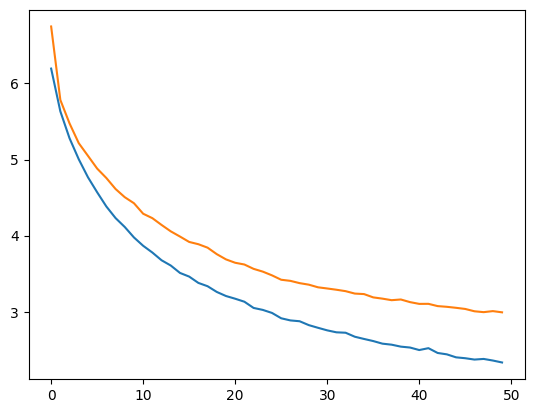

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

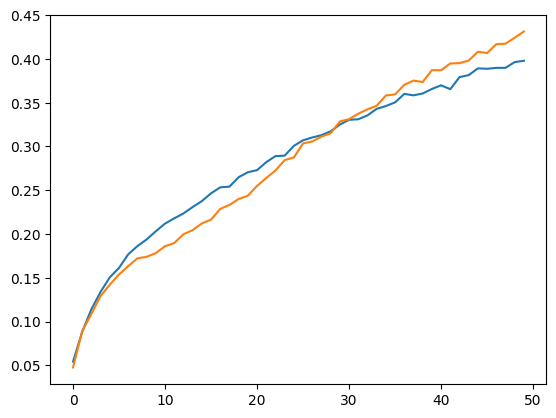

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [86]:
import time
text = "i'm sorry to hear"

for i in range(10):
  #tokenization of text
  token_text = tokenizer.texts_to_sequences([text])[0]

  #padding of text
  padded_token_text = pad_sequences([token_text], maxlen=18, padding='pre')

  #prediction
  pos = np.argmax(model.predict(padded_token_text))

  for word, index in tokenizer.word_index.items():
    if index == pos:
      text = text + " "+ word
      print(text)
      time.sleep(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
i'm sorry to hear that
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
i'm sorry to hear that would
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
i'm sorry to hear that would you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
i'm sorry to hear that would you like
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
i'm sorry to hear that would you like the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
i'm sorry to hear that would you like the assignments
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
i'm sorry to hear that would you like the assignments from
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
i'm sorry to hear that would you like the assignments from english
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
i'm sorry to hear that would you like the assignments from english class
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
i'm sorry to hear that would you like the assignments from english class class
